In [14]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

In [15]:
Vbase = 400/np.sqrt(3)
Sbase = 1000
Ibase = Sbase/Vbase
Zbase = Vbase/Ibase
Rbase = Vbase/Ibase
Lbase = Zbase/(2*pi*50)
Cbase = 1/(Zbase*2*pi*50)
Vbase = np.sqrt(2)*Vbase
Ibase = np.sqrt(2)*Ibase

#Inverter Variables(in pu)
w = 2*pi*50
Lf = 4*10**(-3)
Rf = 0.05
Cf= 3*10**(-6)
Rc = 0.05
Lc = 2.4*10**(-3)
Vdc = 1
#Load Variables
RLoad = 0.8
XLoad = 0.6

T_inv = 0.002


#Machine Variables(in pu)
xd =1.56
xdd=0.296
xq =2
xqd=0.4
Td0=3.7;
Tq0=0.6;
J=40;
D=0.2;
Rsg=0.00;
Ka=24;
Ta=0.05;
Tsv=0.05;
Tch=0.5;
Rd=0.005;
Pref=1.0;
Vref=1.15;

In [16]:
def Inverter(t,x):
    Ifd,Ifq,Vcd,Vcq,Iod,Ioq,Vid,Viq,Eqd,Edd,delta,d_w,Efd,Psv,Pm = x
    Vod = Iod*RLoad - Ioq*XLoad
    Voq = Iod*XLoad + Ioq*RLoad
    md = (Edd - Ioq*xqd - Iod*Rsg)
    mq = (Eqd - Ioq*Rsg + Iod*xdd)
    Vid_dot = (1/T_inv)*(-Vid + md*Vdc)
    Viq_dot = (1/T_inv)*(-Viq + mq*Vdc)
    Ifd_dot = (-Rf/Lf)*Ifd + w*Ifq + (Vid - Vcd)/Lf
    Ifq_dot = -w*Ifd + (-Rf/Lf)*Ifq + (Viq - Vcq)/Lf
    Vcd_dot = w*Vcq + (Ifd - Iod)/Cf
    Vcq_dot = -w*Vcd + (Ifq - Ioq)/Cf
    Iod_dot = (-Rc/Lc)*Iod + w*Ioq + (Vcd - Vod)/Lc
    Ioq_dot = -w*Iod + (-Rc/Lc)*Ioq + (Vcq - Voq)/Lc

    ##Machine Equations
    Eqd_dot = (-Eqd - (xd-xdd)*Iod + Efd)/Td0 
    Edd_dot = (-Edd + (xq-xqd)*Ioq)/Tq0 
    del_dot =  d_w
    d_w_dot = (Pm - (Eqd*Ioq + Edd*Iod - (xdd-xqd)*(Iod)*(Ioq)) + D*(d_w))/J 
    Efd_dot = (-Efd +  Ka*(Vref - np.sqrt(Vod**2 + Voq**2)))/Ta
    Psv_dot = (-Psv + Pref - (d_w)/Rd)/Tsv 
    Pm_dot =  (-Pm + Psv)/Tch 
    
    return np.array([Ifd_dot,Ifq_dot,Vcd_dot,Vcq_dot,Iod_dot,Ioq_dot,Vid_dot,Viq_dot,Eqd_dot,Edd_dot,del_dot,d_w_dot,Efd_dot,Psv_dot,Pm_dot])

In [17]:
t0 = 0
t = 5
dt = 0.0001
t_eval = np.arange(t0,t,dt)
x0 = np.array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],])

In [18]:
sol = solve_ivp(Inverter,[t0,t],y0 = x0.ravel(),t_eval = t_eval)
Ifd,Ifq,Vcd,Vcq,Iod,Ioq,Vid,Viq,Eqd,Edd,delta,d_w,Efd,Psv,Pm  = sol.y
t = sol.t

In [19]:
Vod = Iod*RLoad - Ioq*XLoad
Voq = Iod*XLoad + Ioq*RLoad

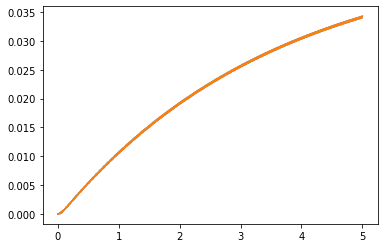

In [20]:
plt.plot(t,np.sqrt(Iod**2 + Ioq**2))
plt.plot(t,np.sqrt(Vod**2 + Voq**2))

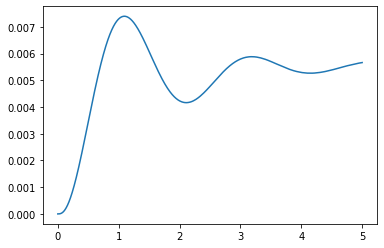

In [21]:
plt.plot(t,d_w)

In [21]:
from sympy import symbols,Matrix,diff, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# define symbols
#Machine Symbols
Edd,Eqd,delta,d_w = symbols(['E_dd','E_qd','delta','delta_omega'])
Pm,Pref,Psv,Efd,Vref= symbols(['P_m','P_ref','P_sv','E_fd','V_ref'])
xd,xdd,xq,xqd,Td0,Tq0,J,D,Rd,Rsg = symbols(['x_d','x_dd','x_q','x_qq','T_d0','T_q0','J','D','R_d','R_sg'])
Ka,Ta, Tsv, Tch,Rd = symbols(['K_a','T_a','T_sv','T_ch','R_d']) 
#Inverter Symbols
Ifd,Ifq,Vcd,Vcq,Iod,Ioq,Vod,Voq = symbols(['I_fd','I_fq','V_cd','V_cq','I_od','I_oq','V_od','V_oq'])
Rf,Lf,w,Cf,Rc,Lc,Vdc = symbols(['R_f','L_f','omega','C_f','R_c','L_c','V_dc'])
RLoad,XLoad,md,mq,Tinv = symbols(['RLoad',"XLoad","m_d","m_q","T_inv"])
Vid,Viq = symbols(['V_id','V_iq'])


In [34]:
Vod = Iod*RLoad - Ioq*XLoad
Voq = Iod*XLoad + Ioq*RLoad
md = (Edd - Ioq*xqd - Iod*Rsg)
mq = (Eqd - Ioq*Rsg + Iod*xdd)
Vid_dot = (1/Tinv)*(-Vid + md*Vdc)
Viq_dot = (1/Tinv)*(-Viq + mq*Vdc)
Ifd_dot = (-Rf/Lf)*Ifd + w*Ifq + (Vid - Vcd)/Lf
Ifq_dot = -w*Ifd + (-Rf/Lf)*Ifq + (Viq - Vcq)/Lf
Vcd_dot = w*Vcq + (Ifd - Iod)/Cf
Vcq_dot = -w*Vcd + (Ifq - Ioq)/Cf
Iod_dot = (-Rc/Lc)*Iod + w*Ioq + (Vcd - Vod)/Lc
Ioq_dot = -w*Iod + (-Rc/Lc)*Ioq + (Vcq - Voq)/Lc

##Machine Equations
Eqd_dot = (-Eqd - (xd-xdd)*Iod + Efd)/Td0 
Edd_dot = (-Edd + (xq-xqd)*Ioq)/Tq0 
del_dot =  d_w
d_w_dot = (Pm - (Eqd*Ioq + Edd*Iod - (xdd-xqd)*(Iod)*(Ioq)) + D*(d_w))/J 
Efd_dot = (-Efd +  Ka*(Vref - sqrt(Vod**2 + Voq**2)))/Ta
Psv_dot = (-Psv + Pref - (d_w)/Rd)/Tsv 
Pm_dot =  (-Pm + Psv)/Tch 

In [35]:
Jacobian = Matrix([[diff(Vid_dot,Vid),diff(Vid_dot,Viq),diff(Vid_dot,Ifd),diff(Vid_dot,Ifq),diff(Vid_dot,Vcd),diff(Vid_dot,Vcq),diff(Vid_dot,Iod),diff(Vid_dot,Ioq),diff(Vid_dot,Eqd),diff(Vid_dot,Edd),diff(Vid_dot,delta),diff(Vid_dot,d_w),diff(Vid_dot,Efd),diff(Vid_dot,Psv),diff(Vid_dot,Pm)],
                   [diff(Viq_dot,Vid),diff(Viq_dot,Viq),diff(Viq_dot,Ifd),diff(Viq_dot,Ifq),diff(Viq_dot,Vcd),diff(Viq_dot,Vcq),diff(Viq_dot,Iod),diff(Viq_dot,Ioq),diff(Viq_dot,Eqd),diff(Viq_dot,Edd),diff(Viq_dot,delta),diff(Viq_dot,d_w),diff(Viq_dot,Efd),diff(Viq_dot,Psv),diff(Viq_dot,Pm)],
                   [diff(Ifd_dot,Vid),diff(Ifd_dot,Viq),diff(Ifd_dot,Ifd),diff(Ifd_dot,Ifq),diff(Ifd_dot,Vcd),diff(Ifd_dot,Vcq),diff(Ifd_dot,Iod),diff(Ifd_dot,Ioq),diff(Ifd_dot,Eqd),diff(Ifd_dot,Edd),diff(Ifd_dot,delta),diff(Ifd_dot,d_w),diff(Ifd_dot,Efd),diff(Ifd_dot,Psv),diff(Ifd_dot,Pm)],
                   [diff(Ifq_dot,Vid),diff(Ifq_dot,Viq),diff(Ifq_dot,Ifd),diff(Ifq_dot,Ifq),diff(Ifq_dot,Vcd),diff(Ifq_dot,Vcq),diff(Ifq_dot,Iod),diff(Ifq_dot,Ioq),diff(Ifq_dot,Eqd),diff(Ifq_dot,Edd),diff(Ifq_dot,delta),diff(Ifq_dot,d_w),diff(Ifq_dot,Efd),diff(Ifq_dot,Psv),diff(Ifq_dot,Pm)],
                   [diff(Vcd_dot,Vid),diff(Vcd_dot,Viq),diff(Vcd_dot,Ifd),diff(Vcd_dot,Ifq),diff(Vcd_dot,Vcd),diff(Vcd_dot,Vcq),diff(Vcd_dot,Iod),diff(Vcd_dot,Ioq),diff(Vcd_dot,Eqd),diff(Vcd_dot,Edd),diff(Vcd_dot,delta),diff(Vcd_dot,d_w),diff(Vcd_dot,Efd),diff(Vcd_dot,Psv),diff(Vcd_dot,Pm)],
                   [diff(Vcq_dot,Vid),diff(Vcq_dot,Viq),diff(Vcq_dot,Ifd),diff(Vcq_dot,Ifq),diff(Vcq_dot,Vcd),diff(Vcq_dot,Vcq),diff(Vcq_dot,Iod),diff(Vcq_dot,Ioq),diff(Vcq_dot,Eqd),diff(Vcq_dot,Edd),diff(Vcq_dot,delta),diff(Vcq_dot,d_w),diff(Vcq_dot,Efd),diff(Vcq_dot,Psv),diff(Vcq_dot,Pm)],
                   [diff(Iod_dot,Vid),diff(Iod_dot,Viq),diff(Iod_dot,Ifd),diff(Iod_dot,Ifq),diff(Iod_dot,Vcd),diff(Iod_dot,Vcq),diff(Iod_dot,Iod),diff(Iod_dot,Ioq),diff(Iod_dot,Eqd),diff(Iod_dot,Edd),diff(Iod_dot,delta),diff(Iod_dot,d_w),diff(Iod_dot,Efd),diff(Iod_dot,Psv),diff(Iod_dot,Pm)],
                   [diff(Ioq_dot,Vid),diff(Ioq_dot,Viq),diff(Ioq_dot,Ifd),diff(Ioq_dot,Ifq),diff(Ioq_dot,Vcd),diff(Ioq_dot,Vcq),diff(Ioq_dot,Iod),diff(Ioq_dot,Ioq),diff(Ioq_dot,Eqd),diff(Ioq_dot,Edd),diff(Ioq_dot,delta),diff(Ioq_dot,d_w),diff(Ioq_dot,Efd),diff(Ioq_dot,Psv),diff(Ioq_dot,Pm)],
                   [diff(Eqd_dot,Vid),diff(Eqd_dot,Viq),diff(Eqd_dot,Ifd),diff(Eqd_dot,Ifq),diff(Eqd_dot,Vcd),diff(Eqd_dot,Vcq),diff(Eqd_dot,Iod),diff(Eqd_dot,Ioq),diff(Eqd_dot,Eqd),diff(Eqd_dot,Edd),diff(Eqd_dot,delta),diff(Eqd_dot,d_w),diff(Eqd_dot,Efd),diff(Eqd_dot,Psv),diff(Eqd_dot,Pm)],
                   [diff(Edd_dot,Vid),diff(Edd_dot,Viq),diff(Edd_dot,Ifd),diff(Edd_dot,Ifq),diff(Edd_dot,Vcd),diff(Edd_dot,Vcq),diff(Edd_dot,Iod),diff(Edd_dot,Ioq),diff(Edd_dot,Eqd),diff(Edd_dot,Edd),diff(Edd_dot,delta),diff(Edd_dot,d_w),diff(Edd_dot,Efd),diff(Edd_dot,Psv),diff(Edd_dot,Pm)],
                   [diff(del_dot,Vid),diff(del_dot,Viq),diff(del_dot,Ifd),diff(del_dot,Ifq),diff(del_dot,Vcd),diff(del_dot,Vcq),diff(del_dot,Iod),diff(del_dot,Ioq),diff(del_dot,Eqd),diff(del_dot,Edd),diff(del_dot,delta),diff(del_dot,d_w),diff(del_dot,Efd),diff(del_dot,Psv),diff(del_dot,Pm)],
                   [diff(d_w_dot,Vid),diff(d_w_dot,Viq),diff(d_w_dot,Ifd),diff(d_w_dot,Ifq),diff(d_w_dot,Vcd),diff(d_w_dot,Vcq),diff(d_w_dot,Iod),diff(d_w_dot,Ioq),diff(d_w_dot,Eqd),diff(d_w_dot,Edd),diff(d_w_dot,delta),diff(d_w_dot,d_w),diff(d_w_dot,Efd),diff(d_w_dot,Psv),diff(d_w_dot,Pm)],
                   [diff(Efd_dot,Vid),diff(Efd_dot,Viq),diff(Efd_dot,Ifd),diff(Efd_dot,Ifq),diff(Efd_dot,Vcd),diff(Efd_dot,Vcq),diff(Efd_dot,Iod),diff(Efd_dot,Ioq),diff(Efd_dot,Eqd),diff(Efd_dot,Edd),diff(Efd_dot,delta),diff(Efd_dot,d_w),diff(Efd_dot,Efd),diff(Efd_dot,Psv),diff(Efd_dot,Pm)],
                   [diff(Psv_dot,Vid),diff(Psv_dot,Viq),diff(Psv_dot,Ifd),diff(Psv_dot,Ifq),diff(Psv_dot,Vcd),diff(Psv_dot,Vcq),diff(Psv_dot,Iod),diff(Psv_dot,Ioq),diff(Psv_dot,Eqd),diff(Psv_dot,Edd),diff(Psv_dot,delta),diff(Psv_dot,d_w),diff(Psv_dot,Efd),diff(Psv_dot,Psv),diff(Psv_dot,Pm)],
                   [diff(Pm_dot,Vid),diff(Pm_dot,Viq),diff(Pm_dot,Ifd),diff(Pm_dot,Ifq),diff(Pm_dot,Vcd),diff(Pm_dot,Vcq),diff(Pm_dot,Iod),diff(Pm_dot,Ioq),diff(Pm_dot,Eqd),diff(Pm_dot,Edd),diff(Pm_dot,delta),diff(Pm_dot,d_w),diff(Pm_dot,Efd),diff(Pm_dot,Psv),diff(Pm_dot,Pm)],

                   ])

In [36]:
Jacobian

Matrix([
[-1/T_inv,        0,        0,        0,      0,      0,                                                                                                                                 -R_sg*V_dc/T_inv,                                                                                                                                 -V_dc*x_qq/T_inv,          0, V_dc/T_inv, 0,             0,      0,       0,       0],
[       0, -1/T_inv,        0,        0,      0,      0,                                                                                                                                  V_dc*x_dd/T_inv,                                                                                                                                 -R_sg*V_dc/T_inv, V_dc/T_inv,          0, 0,             0,      0,       0,       0],
[   1/L_f,        0, -R_f/L_f,    omega, -1/L_f,      0,                                                                                                   

In [47]:
#Inverter Variables(in pu)
wi = 2*np.pi*50
Lfi = 4*10**(-3)
Rfi = 0.05
Cfi= 3*10**(-6)
Rci = 0.05
Lci = 2.4*10**(-3)
Vdci = 1
#Load Variables
RLoadi = 0.8
XLoadi = 0.6

Tinvi = 0.002


#Machine Variables(in pu)
xdi =1.56
xddi=0.296
xqi =2
xqdi=0.4
Td0i=3.7;
Tq0i=0.6;
Ji=40;
Di=0.2;
Rsgi=0.00;
Kai=24;
Tai=0.05;
Tsvi=0.05;
Tchi=0.5;
Rdi=0.005;
Prefi=1.0;
Vrefi=1.15;
#point of linearization
Eddi = Eqdi = 0
Iodi = 1
Ioqi = 0

In [48]:
def Evaluate_Jacobian():
    J_eval = Jacobian.subs([(Td0, Td0i), (Tq0, Tq0i), (xd, xdi),(xq, xqi),(xdd, xddi),(xqd, xqdi),(J, Ji),(D, Di),(Ta,Tai),(Ka,Kai),(Tsv,Tsvi),(Tch,Tchi),(Rd,Rdi),(Rsg,Rsgi)])
    J_eval = J_eval.subs([(Lf, Lfi),(Rf, Rfi),(w, wi),(Cf,Cfi),(Rc, Rci),(Lc,Lci),(Vdc,Vdci),(XLoad,XLoadi),(RLoad, RLoadi),(Edd, Eddi),(Eqd, Eqdi),(Iod, Iodi),(Ioq, Ioqi),(Tinv,Tinvi)])
    eval_jacobian = np.array(J_eval).astype(np.float64)
    return eval_jacobian

def Evaluate_Eigen_Values():
    Jacobian = Evaluate_Jacobian()
    return np.linalg.eigvals(Jacobian)

In [49]:
eigen_values = Evaluate_Eigen_Values()

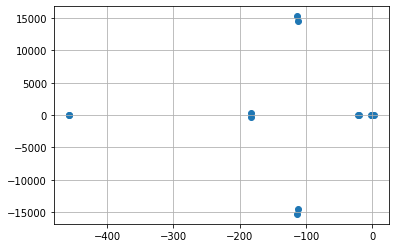

In [50]:
plt.scatter(eigen_values.real,eigen_values.imag)
plt.grid()

In [51]:
eigen_values.real

array([   0.        , -114.07164088, -114.07164088, -112.02488664,
       -112.02488664, -182.85633467, -182.85633467, -457.01948928,
       -457.01948928,  -22.39686906,    1.87576769,   -0.73458474,
         -0.73458474,   -2.80446598,  -20.52583052])